<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting air pollution level in an area in Eindhoven in the upcoming week.

We're going to take the following approach:
1. Problem definition
2. Data
3. Features
4. Data Exploration & Visualization
5. Data Preparation
6. Modelling

<h2><font color=slateblue> 1. Problem Definition </font></h2>

In a statement,
> Given historical pollution data, weather data and people going through an area, can we predict air pollution level in an area in Eindhoven in the upcoming week?

<h2><font color=slateblue> 2. Data </font></h2>

The data is provided by TNO and Zicht op Data.

<h2><font color=slateblue> 3. Features </font></h2>

This is where you'll get different information about each of the features in our data.

We have three separate datasets for the period between 25-09-2021 and 30-12-2021:

**Air pollution**
* date: date in ymd_hms
* PC4: postcode
* pm2.5: particulate matter <2.5um in ug/m3
* pm10: particulate matter <10um in ug/m3
* no2: nitrogen dioxide in ug/m3
* no: nitrogen oxide in ug/m3
* so2: sulphur dioxide in ug/m3


**Meteo**
* date: date in ymd_hms
* PC4: postcode
* wd: wind direction in degrees 0-360
* ws: wind speed in m/s
* blh: boundary layer height in metres
* tcc: total cloud cover in oktas (0-9)
* ssrd: solar surface radiation downwards in W/m2 

(see https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview for more information)

**Zichtop**
* PC4: postcode
* date: date in ymd_hms
* pop_tot: total number of people in PC4 for each time step
* m00_30: number of people who have been there for up to 30 minutes
* m30_60: number of people who have been there for 30 and 60 minutes
* H1_2: number of people who have been there for 1 and 2 hours
* H2_4: number of people who have been there for 2 and 4 hours
* H4_8: number of people who have been there for 4 and 8 hours
* H8_16: number of people who have been there for 8 and 16 hours
* H16plus: number of people who have been there for over 16 hours

<h2><font color=slateblue> 4. Data Exploration & Visualization </font></h2>

<h3><font color=steelblue>Meteo dataset</font><h3>

<h4><font color=mediumvioletred>Read CSV files and get meteo data sample</font></h4>

In [1]:
!pip install windrose
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from windrose import WindroseAxes


df_meteo = pd.read_csv("data/meteo.csv")
df_air_pollution = pd.read_csv("data/air_pollution.csv")
df_meteo.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
58245,2021-08-25 21:00:00,5617,149.969803,3.451474,765.691162,0.995539,0.000000
233921,2021-09-14 17:00:00,5652,304.301636,1.912099,278.921295,0.989855,44.043095
267071,2021-06-27 23:00:00,5656,36.986469,3.783909,238.892624,0.885957,0.000000
159541,2021-03-19 13:00:00,5633,60.361565,4.186870,1311.477661,0.220295,587.215278
235115,2021-11-03 11:00:00,5652,354.265167,1.145092,106.398544,1.000000,178.067656
233986,2021-09-17 10:00:00,5652,205.197830,2.564782,545.666199,0.848093,397.721493
216063,2021-08-31 15:00:00,5646,95.486710,4.452307,928.612549,0.562310,372.345486
232733,2021-07-27 05:00:00,5652,259.699219,2.994544,237.385666,0.992307,32.714564
277483,2021-09-04 19:00:00,5657,34.960678,2.375596,178.121384,0.135610,1.354408
43528,2021-12-20 16:00:00,5615,31.985201,1.802091,100.404823,0.871921,3.227890


<h4><font color=mediumvioletred>Get air pollution data sample</font></h4>

In [2]:
df_air_pollution.sample(10)

,date,PC4,pm10,pm2.5,no2,no,so2
46126,2021-11-09 22:00:00,5654,32.581886,21.921196,40.834194,26.715989,5.502024
313,2021-10-08 01:00:00,5611,29.977919,18.169237,49.191643,32.183894,18.931392
28354,2021-11-06 10:00:00,5632,8.378853,5.401205,15.440095,10.101764,4.839930
72664,2021-12-25 15:00:00,5646,10.652130,11.705690,16.914877,0.721445,6.371763
6986,2021-10-18 02:00:00,5615,14.559152,10.828921,22.498328,14.719650,2.746107
62010,2021-12-12 17:00:00,5623,26.162990,35.681250,25.945504,0.838210,1.292645
38052,2021-11-08 12:00:00,5645,20.554876,8.911386,25.715815,16.824709,5.990637
26273,2021-10-17 17:00:00,5631,15.625467,9.645315,51.003649,33.369409,3.165698
4188,2021-11-04 12:00:00,5613,28.535538,25.895559,41.548596,27.183390,7.304440
48855,2021-10-20 15:00:00,5656,5.493306,4.068668,12.819431,8.387181,1.995720


<h4><font color=mediumvioletred>Show all postal codes</font></h4>

In [3]:
df_meteo['PC4'].unique()

array([5611, 5612, 5613, 5614, 5615, 5616, 5617, 5621, 5622, 5623, 5624,
       5625, 5626, 5627, 5628, 5629, 5631, 5632, 5633, 5641, 5642, 5643,
       5644, 5645, 5646, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658],
      dtype=int64)

The dataset contains data from 33 different postal code areas

<h4><font color=mediumvioletred>Show the shape of the meteo data</font></h4>

In [4]:
df_meteo.shape

(289080, 7)

<h4><font color=mediumvioletred>Show all datatypes of meteo data</font></h4>

In [5]:
df_meteo['date'] = pd.to_datetime(df_meteo['date'])
df_air_pollution['date'] = pd.to_datetime(df_air_pollution['date'])
df_meteo.dtypes

date    datetime64[ns]
PC4              int64
wd             float64
ws             float64
blh            float64
tcc            float64
ssrd           float64
dtype: object

<h4><font color=mediumvioletred>Filter meteo data on single postal code and get a sample</font></h4>

In [6]:
postalcode_df_meteo = df_meteo[df_meteo['PC4'] == 5611]
postalcode_df_meteo.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
2310,2021-04-07 06:00:00,5611,179.731049,8.111948,953.838257,0.880435,9.861093
8263,2021-12-11 07:00:00,5611,187.399475,1.919938,79.016724,0.759298,0.000000
7466,2021-11-08 02:00:00,5611,199.578384,2.626828,130.049088,0.326731,0.000000
8750,2021-12-31 14:00:00,5611,204.204056,6.790852,891.596924,0.986587,73.305052
2773,2021-04-26 13:00:00,5611,54.624420,3.056090,1458.176270,0.141466,786.820278
3896,2021-06-12 08:00:00,5611,167.094131,3.582950,557.198425,0.988984,125.128325
4859,2021-07-22 11:00:00,5611,105.746552,2.591090,1236.261963,0.592528,553.559861
6267,2021-09-19 03:00:00,5611,8.349649,3.053959,210.379333,0.356281,0.000000
8733,2021-12-30 21:00:00,5611,211.792892,6.734316,1174.682983,0.982902,0.000000
3799,2021-06-08 07:00:00,5611,32.454685,1.156276,204.344025,0.000717,352.973472


In this sample the solar surface radiation downawrd (ssrd) shows the value 0.000000. After researching this, it is normal since the sensor can measure this during 6 p.m. and 6 a.m.

<h4><font color=mediumvioletred>Show standard distribution of boundary layer height data</font></h4>

Skewness per column:
PC4     0.133640
wd     -0.214002
ws      0.931107
blh     1.054221
tcc    -0.894305
ssrd    1.656176
dtype: float64


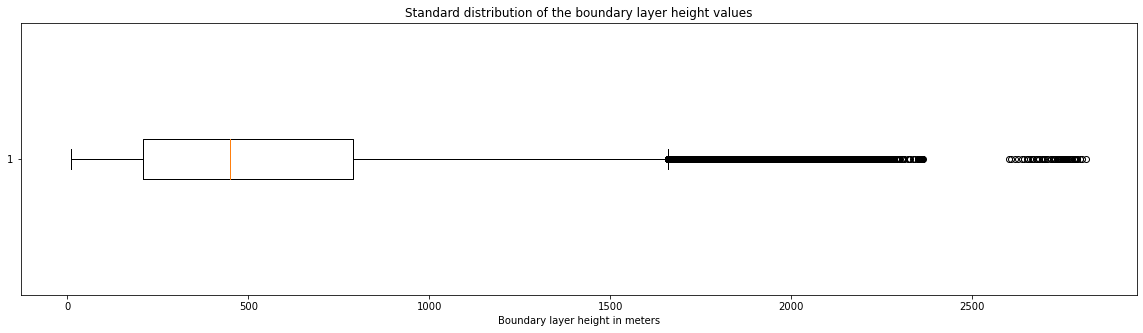

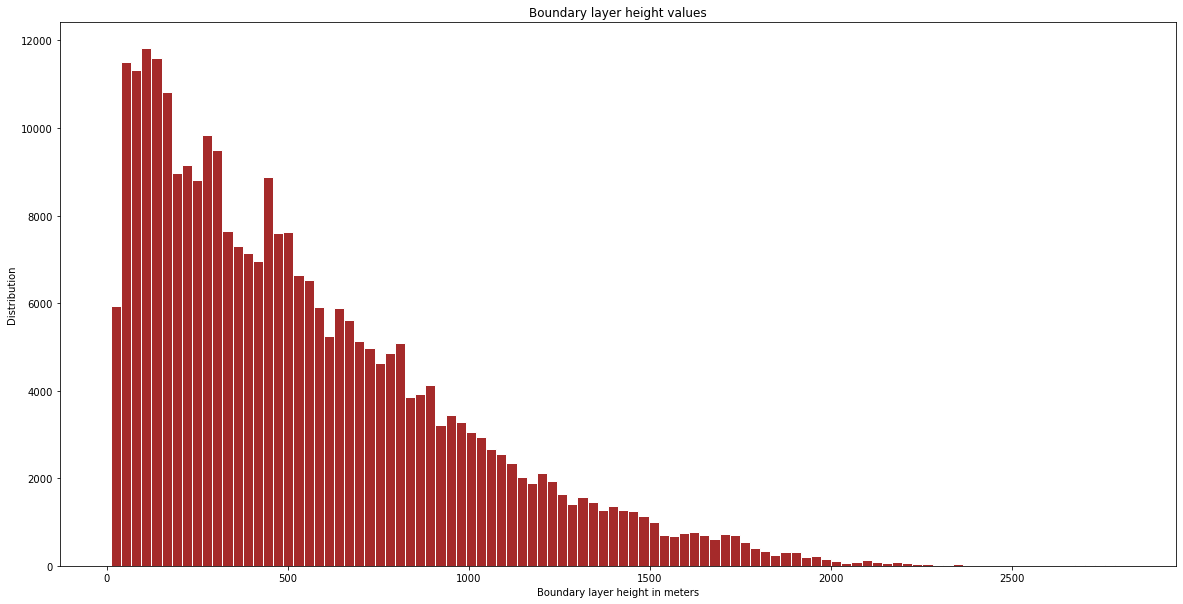

In [7]:
print("Skewness per column:")
print(df_meteo.skew(numeric_only=True))

plt.figure(figsize=(20,5))
plt.boxplot(df_meteo['blh'], vert=False)
plt.title("Standard distribution of the boundary layer height values")
plt.xlabel("Boundary layer height in meters")
plt.show()

plt.figure(figsize=(20,10))
plt.hist(df_meteo['blh'], edgecolor='white', color='brown', bins=100)
plt.title("Boundary layer height values")
plt.xlabel("Boundary layer height in meters")
plt.ylabel("Distribution")
plt.show()

The graphs represent the distribution of the boundary layer height data. The skewness of these graphs are positive. Most of the boundary layer heights are close to zero. You also don't see a lot of outliers on the bottom graph, since the tail of data is not long. This means that the distribution is devided relatively evenly.


<h4><font color=mediumvioletred>Visualize windspeed compared to solar surface radiation downwards</font></h4>

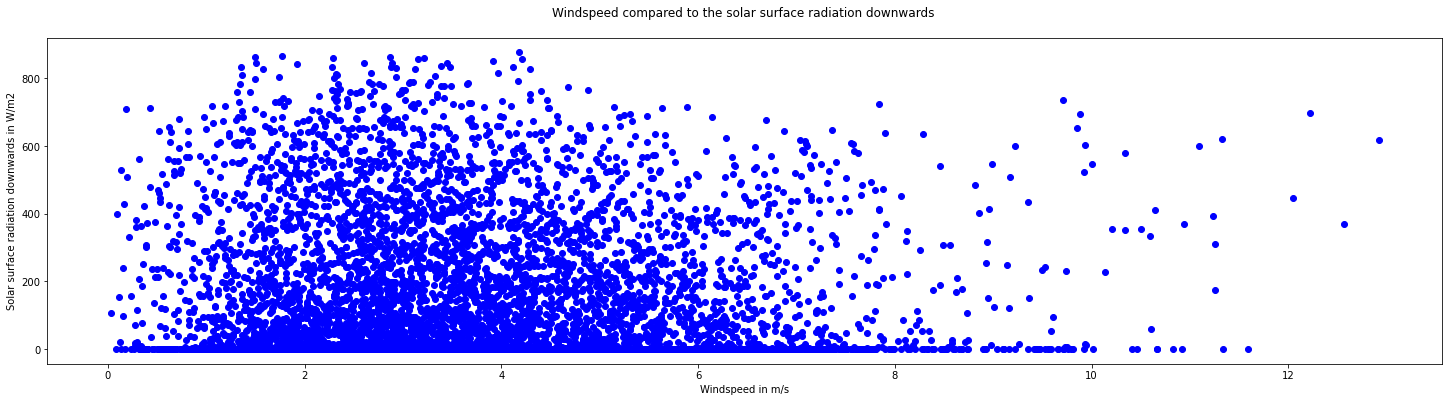

In [8]:
fig, ax = plt.subplots(figsize=(25, 6))
scatter = ax.scatter((postalcode_df_meteo["ws"]),
                list(postalcode_df_meteo["ssrd"]),
                color="blue")

ax.set(title="Windspeed compared to the solar surface radiation downwards \n",
      xlabel="Windspeed in m/s",
      ylabel="Solar surface radiation downwards in W/m2");

In the graph above you can see that the solar surface rediation downwards (ssrd) almost doesn't appear when the windspeed is above 8m/s. So there is a visable correlation between the windspeed and ssrd. It also shows the 0.000000 values of the ssrd.

<h4><font color=mediumvioletred>Visualize windspeed in September from postal code 5611</font></h4>

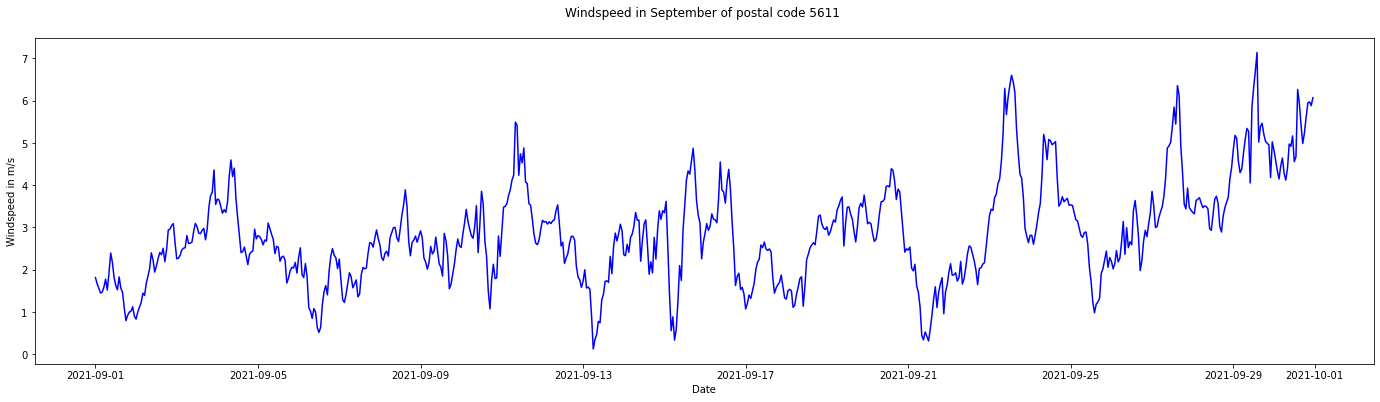

In [9]:
one_month_postalcode_df_meteo = postalcode_df_meteo[postalcode_df_meteo['date']. dt. strftime('%Y-%m')=='2021-09']

fig, ax = plt.subplots(figsize=(24, 6))
plot = ax.plot(list(one_month_postalcode_df_meteo["date"]),
                list(one_month_postalcode_df_meteo["ws"]),
                color="blue")

ax.set(title="Windspeed in September of postal code 5611 \n",
      xlabel="Date",
      ylabel="Windspeed in m/s");


No real conclusion can be drawn from just looking at the windspeed data. 


<h4><font color=mediumvioletred>Merge meteo and air pollution dataset and show sample</font></h4>

In [10]:
df_meteo_air_pollution = pd.merge(df_meteo, df_air_pollution[['PC4','date', 'pm10', 'pm2.5', 'no2',	'no', 'so2']], on=['PC4', 'date'])
df_meteo_air_pollution.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
39262,2021-12-17 21:00:00,5631,51.476036,1.401982,191.231949,0.981255,0.000000,46.186570,69.844010,40.488949,2.588777,0.664326
53158,2021-12-14 21:00:00,5644,222.602966,4.153731,436.738770,1.000000,0.000000,29.894980,51.430940,33.909898,0.626347,4.708680
4906,2021-10-05 10:00:00,5613,292.097504,5.847796,1330.247192,0.634439,318.799444,4.833952,2.382388,9.501581,6.216460,0.764946
3064,2021-10-25 16:00:00,5612,242.143402,3.277405,491.867462,0.996217,27.324826,13.748197,8.887820,43.877637,28.707177,4.752811
68110,2021-10-19 22:00:00,5655,237.371246,6.608961,710.517151,0.955620,0.000000,6.023471,3.507000,8.681263,5.679762,5.017190
74192,2021-12-18 07:00:00,5657,51.492317,1.512193,226.622147,1.000000,0.000000,25.225560,40.715550,18.069893,0.160100,0.345975
15611,2021-12-02 10:00:00,5617,172.911240,4.264513,446.608063,0.799274,137.626224,15.968570,12.181496,9.097578,1.579858,0.874943
26520,2021-11-02 00:00:00,5625,244.601746,3.797328,312.679413,0.779195,0.000000,11.376079,7.800444,25.871151,16.926338,3.406202
49543,2021-10-22 07:00:00,5643,205.680191,6.795714,1048.806763,0.439268,13.729602,14.206520,5.804964,19.188419,12.554125,4.377343
41602,2021-12-18 09:00:00,5632,38.170605,2.114389,200.247421,1.000000,12.105240,34.441380,52.966220,24.550394,1.943091,0.670124


<h4><font color=mediumvioletred> Wind direction per day from 25-09 until 12-30 </font></h4>

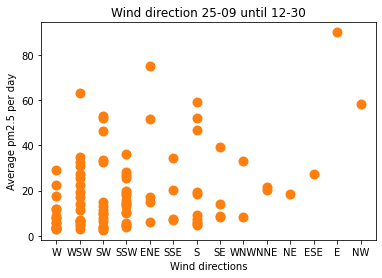

In [11]:
directions = np.array('N NNE NE ENE E ESE SE SSE S SSW SW WSW W WNW NW NNW N'.split())
bins = np.arange(11.25, 372, 22.5)

group_by_day2 = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean() 

group_by_day2['wd_stat'] = directions[np.digitize(group_by_day2['wd'], bins)] 
group_by_day2.sample(5) 

plt.scatter(group_by_day2["wd_stat"], group_by_day2["pm2.5"], linewidth=0.0 , s = 100 , c = "C1") 
 

plt.title('Wind direction 25-09 until 12-30') 
plt.xlabel('Wind directions') 
plt.ylabel('Average pm2.5 per day') 
plt.show()


In the last 3 months of 2021, the wind direction was mostly from the west and south. However, the data was not as varied as we had hoped, and many of the highest spikes in pm2.5 came from the east. This is likely due to the presence of the Roergebied region, which is known for its bad air. Overall, the data may not be as useful as we had hoped because it lacks diversity in wind direction.

<h4><font color=mediumvioletred>Create new column to classify wind direction</font></h4>

In [12]:
def degToCompass(num):
    val=int((num/22.5)+.5)
    arr=["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]

    return arr[(val % 16)]

df_meteo_air_pollution['wd_c'] = df_meteo_air_pollution.apply(lambda row: degToCompass(row.wd), axis=1)

def degToCompassNumerical(num):
    val=int((num/22.5)+.5)

    return (val % 16)

df_meteo_air_pollution['wd_c_n'] = df_meteo_air_pollution.apply(lambda row: degToCompassNumerical(row.wd), axis=1)

df_meteo_air_pollution.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2,wd_c,wd_c_n
34550,2021-12-15 13:00:00,5628,209.846100,3.797304,504.759613,0.971699,56.718819,29.695980,49.476930,26.626816,4.899671,4.094203,SSW,9
73361,2021-11-13 17:00:00,5657,111.951874,2.224945,149.376495,0.637492,0.000000,9.030220,5.501269,31.396848,20.541555,2.039925,ESE,5
39175,2021-12-14 06:00:00,5631,220.847000,3.151743,362.757721,0.999330,0.000000,20.655480,35.894030,20.763707,1.035571,2.779204,SW,10
14485,2021-10-16 13:00:00,5617,236.180954,1.627986,1505.222046,0.805942,327.665486,11.426986,4.982026,16.255116,10.634996,0.267587,SW,10
34892,2021-12-29 19:00:00,5628,195.164825,6.525191,776.570496,1.000000,0.000000,17.511920,21.063220,17.987361,0.195505,1.878245,SSW,9
33613,2021-11-06 13:00:00,5628,237.211487,5.500072,670.349182,1.000000,121.381302,11.917644,6.016112,16.331471,10.684952,4.638085,WSW,11
10514,2021-11-14 02:00:00,5615,43.207325,1.861745,123.976105,1.000000,0.000000,21.450815,19.893070,22.409181,14.661326,0.006816,NE,2
53121,2021-12-13 08:00:00,5644,248.048294,3.738204,311.038788,0.740775,1.167377,29.194300,48.988530,23.022649,1.758301,2.780051,WSW,11
26558,2021-11-03 14:00:00,5625,103.965195,2.262634,305.503784,1.000000,119.495382,22.957001,18.115553,39.471337,25.824332,2.860355,ESE,5
67007,2021-12-09 22:00:00,5654,269.708954,4.418337,388.720154,0.214001,0.000000,26.272720,38.150490,19.361133,0.232650,1.898054,W,12


<h4><font color=mediumvioletred>Show corrolation between merged meteo and air pollution data</font></h4>

In [13]:
df_meteo_air_pollution.corr(method='spearman')

,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2,wd_c_n
PC4,1.000000,-0.000203,-0.001175,-0.000395,-0.000085,0.000106,-0.026865,-0.028674,-0.034462,-0.027125,0.004346,0.000335
wd,-0.000203,1.000000,0.190082,0.048322,0.050032,0.032333,-0.148475,-0.106274,-0.161741,-0.109364,-0.008121,0.926805
ws,-0.001175,0.190082,1.000000,0.807271,0.176822,0.073962,-0.607904,-0.472557,-0.591700,-0.499212,-0.212465,0.227314
blh,-0.000395,0.048322,0.807271,1.000000,0.200182,0.341155,-0.615602,-0.542800,-0.655762,-0.502562,-0.337730,0.088094
tcc,-0.000085,0.050032,0.176822,0.200182,1.000000,0.001251,-0.031441,0.110042,-0.105527,-0.186421,-0.208994,0.093946
ssrd,0.000106,0.032333,0.073962,0.341155,0.001251,1.000000,-0.059004,-0.158170,-0.206825,-0.049303,-0.076840,0.026012
pm10,-0.026865,-0.148475,-0.607904,-0.615602,-0.031441,-0.059004,1.000000,0.886844,0.560476,0.283385,0.336788,-0.186965
pm2.5,-0.028674,-0.106274,-0.472557,-0.542800,0.110042,-0.158170,0.886844,1.000000,0.431592,0.014917,0.189855,-0.133190
no2,-0.034462,-0.161741,-0.591700,-0.655762,-0.105527,-0.206825,0.560476,0.431592,1.000000,0.735620,0.394545,-0.189193
no,-0.027125,-0.109364,-0.499212,-0.502562,-0.186421,-0.049303,0.283385,0.014917,0.735620,1.000000,0.371746,-0.127087


With the spearman method, it can be noted that the particulate matter smaller than 2.5 micrometer (pm2.5) has the most corrolation with the boundary layer height (blh), the windspeed (ws), and nitrogen dioxide in ug/m3 (no2).

<h4><font color=mediumvioletred>Show all particlate matter of 2.5 micrometers or smaller for every wind direction</font></h4>

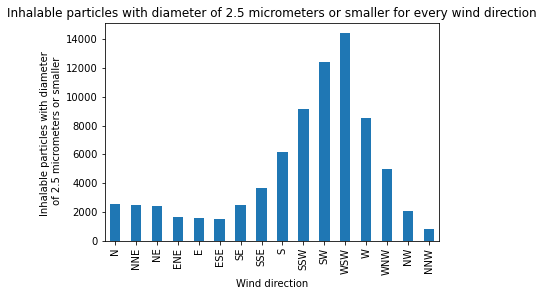

In [14]:
plt = df_meteo_air_pollution[['wd_c_n', 'pm2.5']].groupby('wd_c_n').count().plot(kind='bar', legend=None)
plt.set_title("Inhalable particles with diameter of 2.5 micrometers or smaller for every wind direction")
plt.set_xlabel("Wind direction")
plt.set_ylabel("Inhalable particles with diameter \n of 2.5 micrometers or smaller")
plt.set_xticks(range(len(["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"])), ["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]);

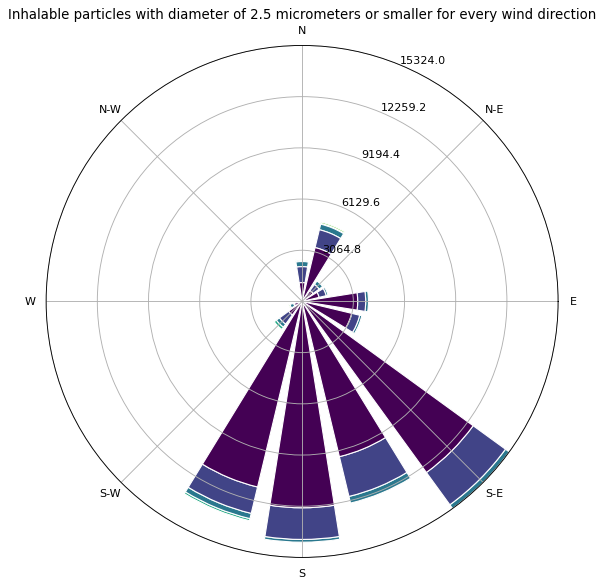

In [15]:
wd_c_n = (df_meteo_air_pollution['wd_c_n'] * 16)
pm25 = df_meteo_air_pollution['pm2.5']

ax = WindroseAxes.from_ax()
ax.bar(wd_c_n, pm25, edgecolor='white')
ax.set_title('Inhalable particles with diameter of 2.5 micrometers or smaller for every wind direction');

The most inhalable particles with diameter of 2.5 micrometers or smaller come from the winddirections south, southwest, and west. This is in the months October, November and December

<h4><font color=mediumvioletred>Show corrolation between particulate matter smaller than 2.5 um and windspeed</font></h4>

In [16]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["ws"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["ws"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["ws"]), np.poly1d(np.polyfit(group_by_day["ws"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["ws"])), color='red')
plt.title('Correlation between PM2.5 and windspeed')
plt.xlabel('Windspeed in m/s')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller');
# Particulate matter <2.5um in ug/m3

-0.4220468437258586


TypeError: 'Text' object is not callable

The inhalable particles with diameter of 2.5 micrometers or smaller keep decreasing when the windspeed keep increasing. So there is a low negative correlation between the two. Which means with higher wind speeds there are less particals of 2.5 micrometers or smaller in the air.  

<h4><font color=mediumvioletred>Show corrolation between particulate matter smaller than 2.5 um and boundary layer height</font></h4>

In [ ]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["blh"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["blh"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["blh"]), np.poly1d(np.polyfit(group_by_day["blh"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["blh"])), color='red')
plt.title('Correlation between PM2.5 and boundary layer heigt')
plt.xlabel('Boundary layer height in m')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller');
# Particulate matter <2.5um in ug/m3

The inhalable particles with diameter of 2.5 micrometers or smaller keep decreasing when the boundary layer height keeps increasing. So there is a low negative correlation between the two. Which means that how higher the boundary layer, the less there are particles of 2.5 micrometer or smaller in the air.

<h4><font color=mediumvioletred>Show corrolation between particulate matter smaller than 2.5 um and solar surface radiation downwards</font></h4>

In [ ]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["ssrd"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["ssrd"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["ssrd"]), np.poly1d(np.polyfit(group_by_day["ssrd"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["ssrd"])), color='red')
plt.title('Correlation between PM2.5 and solar surface radiation downwards')
plt.xlabel('Solar surface radiation downwards in w/m^2')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller');
# Particulate matter <2.5um in ug/m3

The inhalable particles with diameter of 2.5 micrometers or smaller keep decreasing when the solar surface radiation keep increasing. So there is a low negative correlation between the two. Which means that the higher the solar surface radiation is the less there are particles smaller than 2.5 micrometer in the air.

<h4><font color=mediumvioletred> Visualize the boundary layer height for the first week of November of postal code 5611</font></h4>

In [ ]:
# Combined meto and air polution data for postalcode 5611
postalcode_df_meteo_air_polution = df_meteo_air_pollution[df_meteo_air_pollution['PC4'] == 5611]

# Combined data for the first week of november 2021 from postal code 5611 (24 * 7 = 168 entries)
one_week_postalcode_df_meteo_air_polution = postalcode_df_meteo_air_polution[postalcode_df_meteo_air_polution['date']. dt. strftime('%Y-%m')=='2021-11'].head(168)
    
plt.figure(figsize = (20 ,5))

plt.plot(one_week_postalcode_df_meteo_air_polution['date'], one_week_postalcode_df_meteo_air_polution['blh'])
 
# Adding Title to the Plot
plt.title('Boundary layer height for the first week of November of postal code 5611')

# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('Boundary layer height in meters')
  
plt.show()

In the graph above you can see that almost every day at around noon the boundary layer height increases and decreases later at night. That is because the surface temperature at noon elevated lead to increased sensitive heat flux, and as a result, the boundary layer height will develop higher during daytime. 

<h4><font color=mediumvioletred> Visualize particulate matter smaller than 2.5 micrometers for the first week of November of postal code 5611</font></h4>

In [ ]:
plt.figure(figsize = (20 ,5))

plt.plot(one_week_postalcode_df_meteo_air_polution['date'], one_week_postalcode_df_meteo_air_polution['pm2.5'])
 
# Adding Title to the Plot
plt.title('Inhalable particles with diameter of 2.5 micrometers or smaller for the first week of November of postal code 5611')

# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller')
  
plt.show()

In the graph above the particulate matter of 2.5 micrometer or smaller is visualized for the first week of November. You can see that almost every night the particals are lower then during the day. It is hard to see peaks in PM2.5 during the day but you can see a clearly difference between the particals at night and day. 

<h4><font color=mediumvioletred>Conclusion</font></h4>

After exploring and visualising the combined meteo- and pollution data, we came to the conclusion that the boundary layer height, the windspeed, the nitrogen dioxide in ug/m3, and the solar surface radiation downwards had the most corrolation on the PM2.5 values. Since this is the most important measurement of the pollution data, we devided that moving forward we are going to use this data in the air pollution prediction tool.

<h2><font color=slateblue> 5. Data Preparation </font></h2>

<h2><font color=slateblue> 6. Modelling </font></h2>